In [196]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from skfuzzy import control as ctrl
import seaborn  as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap


from sklearn.cluster import KMeans

In [197]:
dataset = pd.read_csv('data/data_market.csv', encoding='latin1')

In [198]:
for x_column in dataset :
    x_sales = dataset['Sales']
    x_profit = dataset['Profit']

    dataset['profit_margin'] = x_profit/x_sales

x_avg = dataset['profit_margin'].mean()

print(x_avg)

0.25022813688212764


In [199]:
dataset.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
profit_margin    0
dtype: int64

# **K-means**

In [200]:
# X = dataset.drop(['Order ID','State','Profit','Sub Category'],axis=1)
X = dataset[['profit_margin']]

encoder = LabelEncoder()
columns_used = X.columns

In [201]:
len(dataset['City'].unique())

24

In [202]:
len(dataset['Category'].unique())

7

In [203]:
for col in columns_used :
    if(col != 'profit_margin') :
        X[col] = encoder.fit_transform(X[col])

for col in columns_used:
    if(col != 'profit_margin') :
        X[col] = X[col].round(2)

X.head()

,profit_margin
0,0.32
1,0.20
2,0.07
3,0.10
4,0.39


<AxesSubplot:>

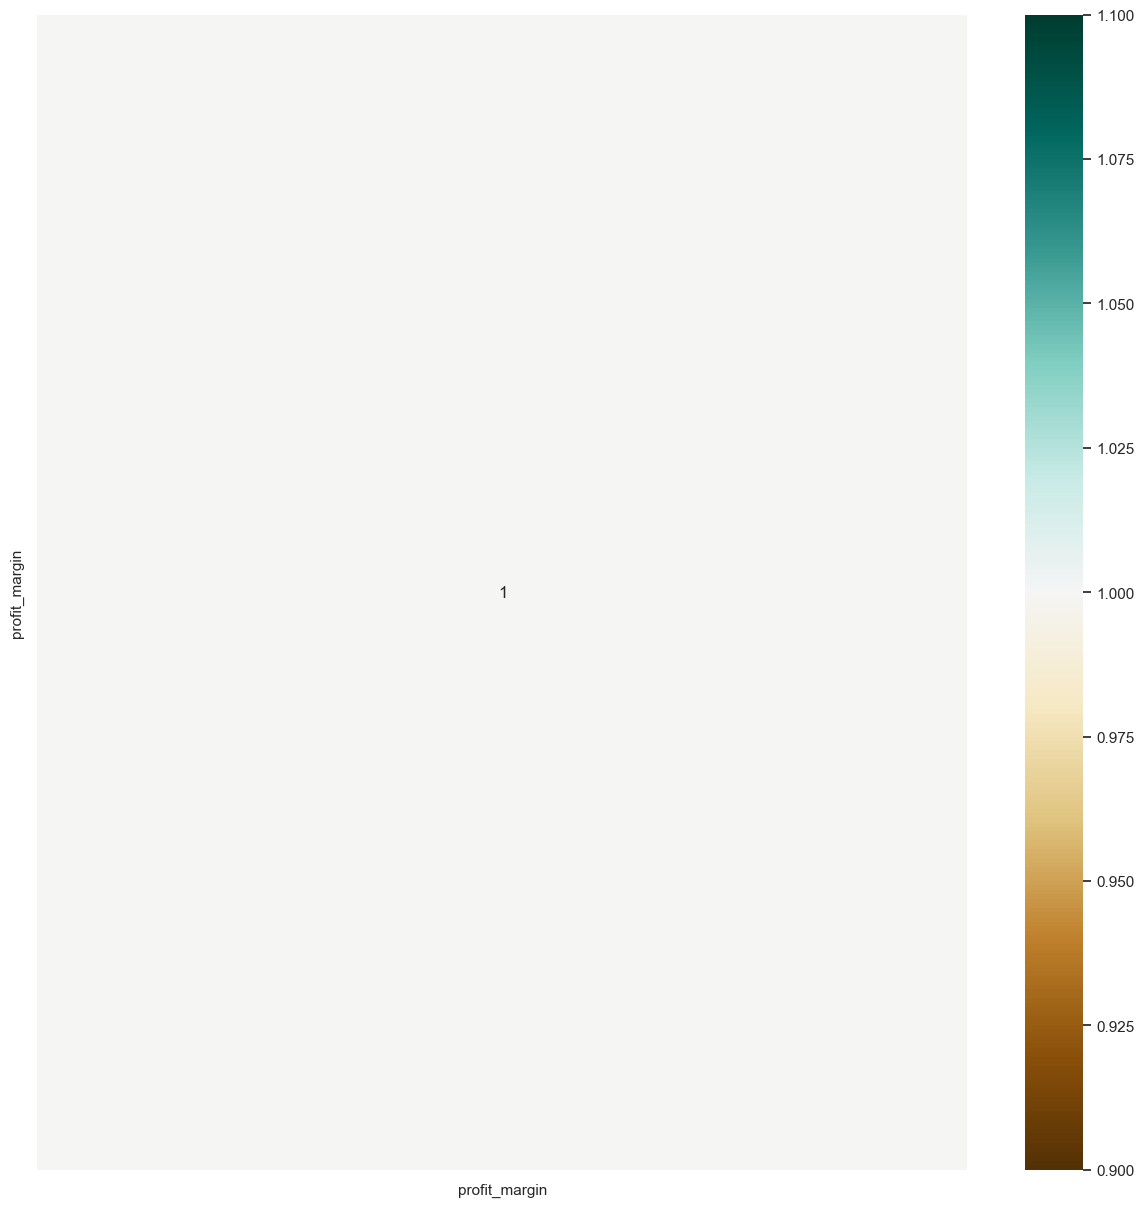

In [204]:
heatcol = X.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

In [205]:
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)
X.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_21820\4044353206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X)


,profit_margin,Cluster
0,0.32,2
1,0.20,2
2,0.07,0
3,0.10,0
4,0.39,1


In [206]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [207]:
for index, row in X.iterrows():
    Clustered = ''
    if row['Cluster'] == 1:
        Clustered = 'High'
    elif row['Cluster'] == 2:
        Clustered = 'Medium'
    else:
        Clustered = 'Low'
        
    dataset.at[index, 'Cluster'] = Clustered

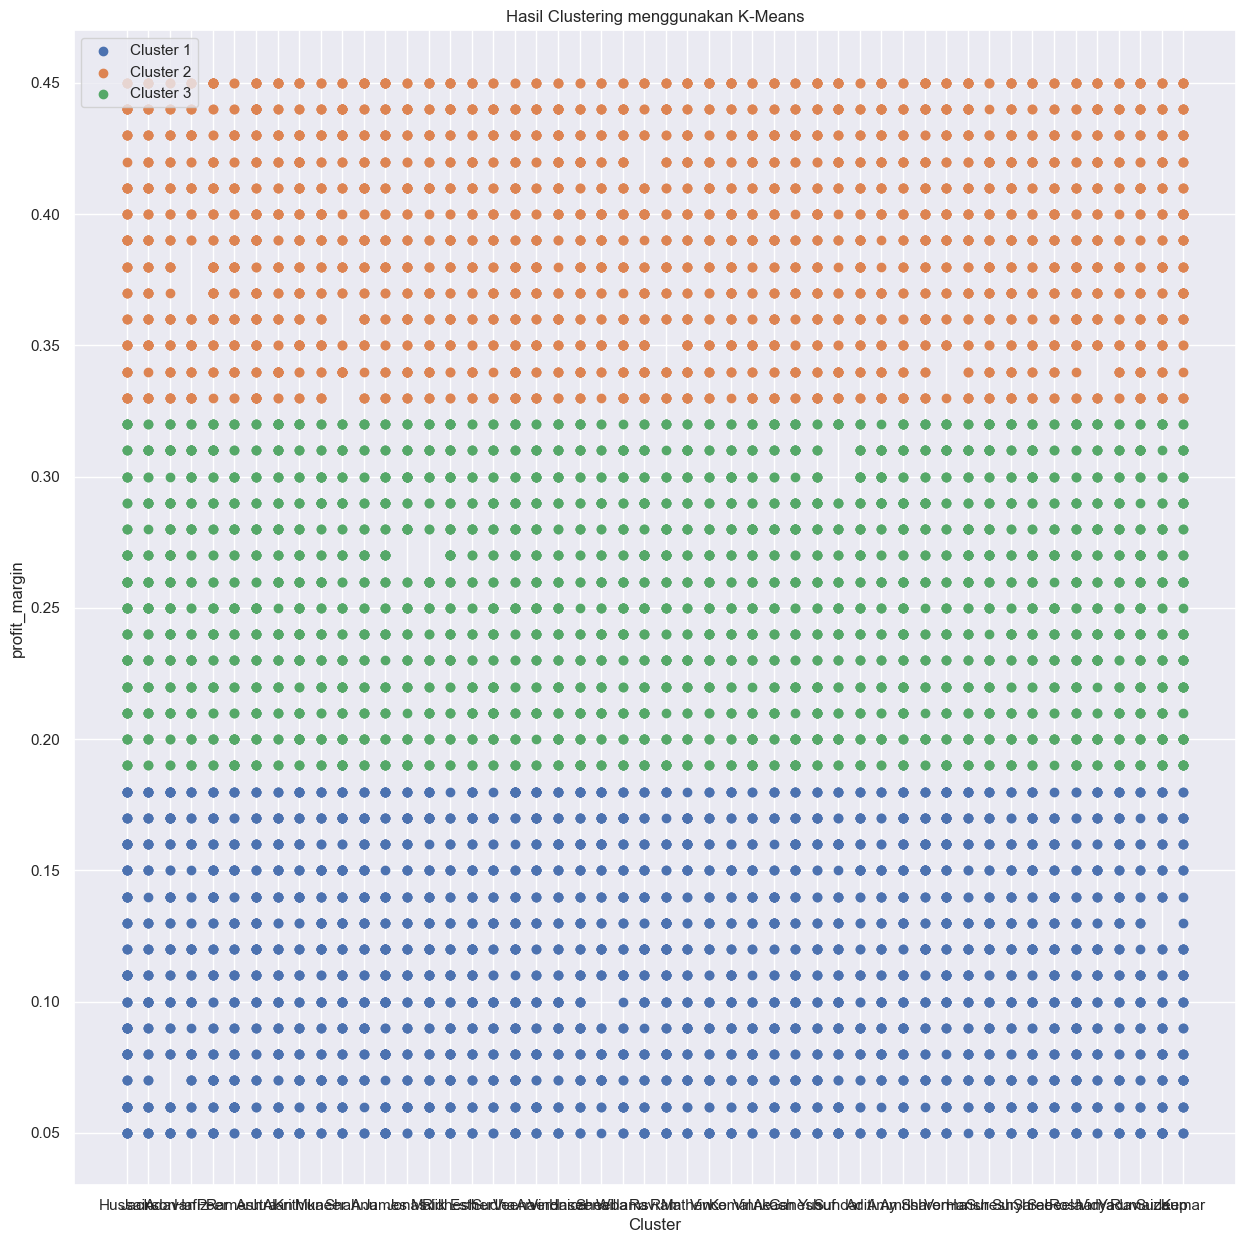

In [208]:
for cluster_num in range(3):
    cluster_data = dataset[X['Cluster'] == cluster_num]
    plt.scatter(
        cluster_data['Customer Name'], 
        cluster_data['profit_margin'], 
        label=f'Cluster {cluster_num + 1}'
    )

plt.xlabel('Cluster')
plt.ylabel('profit_margin')
plt.legend()
plt.title('Hasil Clustering menggunakan K-Means')
plt.show()

In [209]:
dataset.to_csv('./data/market_cluster.csv', index=False)